<a href="https://colab.research.google.com/github/takiyama0617/colaboratory/blob/master/sample_PyTorch_MNIST_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PyTorch
* Facebookにより開発されたPython向けオープンソース機械学習ライブラリ

In [1]:
!pip install torch torchvision

In [0]:
import matplotlib.pyplot as plt
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
from torchvision.datasets import MNIST

In [9]:
data_folder = '~/data'
BATCH_SIZE = 8

mnist_data = MNIST(data_folder, train=True, download=True, transform=transforms.ToTensor())

data_loader = DataLoader(mnist_data, batch_size=BATCH_SIZE, shuffle=False)


Extracting /root/data/MNIST/raw/train-images-idx3-ubyte.gz to /root/data/MNIST/raw



Extracting /root/data/MNIST/raw/train-labels-idx1-ubyte.gz to /root/data/MNIST/raw



Extracting /root/data/MNIST/raw/t10k-images-idx3-ubyte.gz to /root/data/MNIST/raw



Extracting /root/data/MNIST/raw/t10k-labels-idx1-ubyte.gz to /root/data/MNIST/raw
Processing...
Done!


In [10]:
data_iterator = iter(data_loader)
images, labels = data_iterator.next()

print(len(images))
print(len(labels))

8
8


(1, 28, 28)


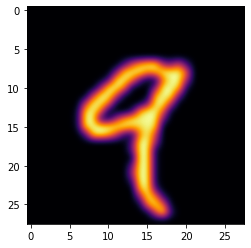

ラベル： tensor(9)


In [11]:
location = 4
# numpy行列に変換
data = images[location].numpy()
print(data.shape)

# データチャンネル調整
reshaped_data = data.reshape(28, 28)
plt.imshow(reshaped_data, cmap='inferno', interpolation='bicubic')
plt.show()
print('ラベル：', labels[location])

In [0]:
# 学習データ
train_data_with_labels = MNIST(data_folder, train=True, download=True, transform=transforms.ToTensor())
train_data_loader = DataLoader(train_data_with_labels, batch_size=BATCH_SIZE, shuffle=True)

# 検証データ
test_data_with_labels = MNIST(data_folder, train=False, download=True, transform=transforms.ToTensor())
test_data_loader = DataLoader(test_data_with_labels, batch_size=BATCH_SIZE, shuffle=True)

## ニューラルネットワークの定義
* ニューラルネットワークは、torch.nnパッケージで定義
* ネットワークは、フィードフォワードニューラルネットワーク
  * MLP(マルチレイヤーパーセプトロン)の典型的なニューラルネットワークアーキテクチャー

In [0]:
from torch.autograd import Variable
import torch.nn as nn 

class MLP(nn.Module) :
  def __init__(self) :
    super().__init__()
    # 入力層
    self.layer1 = nn.Linear(28 * 28, 100)
    #　中間層
    self.layer2 = nn.Linear(100, 50)
    # 出力層
    self.layer3 = nn.Linear(50, 10)
  
  def forward(self, input_data) :
    input_data = input_data.view(-1, 28 * 28)
    input_data = self.layer1(input_data)
    input_data = self.layer2(input_data)
    input_data = self.layer3(input_data)
    return input_data

In [0]:
model = MLP()

## コスト関数と最適化手法を定義
* コスト関数：クロスエントロピー
* 最適化手法：確率勾配降下法

In [0]:
import torch.optim as optimizer

# ソフトマックス：クロスエントロピー
lossResult = nn.CrossEntropyLoss()
# SGD
optimizer = optimizer.SGD(model.parameters(), lr=0.01)

## 学習

In [21]:
MAX_EPOCH = 4

for epoch in range(MAX_EPOCH) :
  total_loss = 0.0
  for i, data in enumerate(train_data_loader) :
    # 学習データと教師データの取得
    train_data, teacher_labels = data
    # torch.autograd.Variableに変換
    train_data, teacher_labels = Variable(train_data), Variable(teacher_labels)

    # 計算された勾配情報を削除
    optimizer.zero_grad()

    # モデルに学習データを与え、予測を計算
    outputs = model(train_data)
    # lossとwによる微分計算
    loss = lossResult(outputs, teacher_labels)
    loss.backward()
    # 勾配を更新
    optimizer.step()
    # 誤差累計
    total_loss += loss.item()

    if i % 2000 == 1999:
      print('学習進捗 : [%d, %d] 学習誤差(loss) : %.3f' % (epoch + 1, i + 1, total_loss / 2000))
      total_loss = 0.0

print('学習終了')

学習進捗 : [1, 2000] 学習誤差(loss) : 0.844
学習進捗 : [1, 4000] 学習誤差(loss) : 0.378
学習進捗 : [1, 6000] 学習誤差(loss) : 0.354
学習進捗 : [2, 2000] 学習誤差(loss) : 0.326
学習進捗 : [2, 4000] 学習誤差(loss) : 0.313
学習進捗 : [2, 6000] 学習誤差(loss) : 0.295
学習進捗 : [3, 2000] 学習誤差(loss) : 0.290
学習進捗 : [3, 4000] 学習誤差(loss) : 0.301
学習進捗 : [3, 6000] 学習誤差(loss) : 0.295
学習進捗 : [4, 2000] 学習誤差(loss) : 0.296
学習進捗 : [4, 4000] 学習誤差(loss) : 0.285
学習進捗 : [4, 6000] 学習誤差(loss) : 0.285
学習終了


## 検証

In [23]:
import torch

total = 0
count_when_correct = 0

for data in test_data_loader :
  test_data, teacher_labels = data
  results = model(Variable(test_data))
  _, predicted = torch.max(results.data, 1)

  total += teacher_labels.size(0)
  count_when_correct += (predicted == teacher_labels).sum()

print('count_when_correct : %d' % (count_when_correct))
print('total : %d' % (total))

print('正解率 : %d / %d = %f' %(count_when_correct, total, int(count_when_correct) / int(total)))

count_when_correct : 9204
total : 10000
正解率 : 9204 / 10000 = 0.920400
